## Interação e Concorrência 2024/2025

### 3-SAT Problem

##### Gonçalo Gonçalves Barroso A102931
##### Rafaela Antunes Pereira A102527

#### 1 - Realização de uma proposta de uma fórmula booleana 3-SAT

Para este exercício, propomos uma fórmula booleana no formato 3-SAT que é solucionável, ou seja, existe pelo menos uma combinação de valores de verdade que satisfaz todas as cláusulas simultaneamente. A fórmula 
𝐹
F é composta por quatro cláusulas, cada uma contendo exatamente três literais.

$$
F = (x_1 \lor \neg x_2 \lor x_3) \land (\neg x_1 \lor \neg x_2 \lor x_3) \land (x_1 \lor x_2 \lor \neg x_3) \land (\neg x_1 \lor \neg x_2 \lor \neg x_3) \land (x_1 \lor x_2 \lor x_3) \land (x_1 \lor \neg x_2 \lor \neg x_3) \land (\neg x_1 \lor x_2 \lor \neg x_3)
$$


Com o objetivo de verificar a satisfatibilidade da fórmula proposta, procedeu-se à análise de todas as possíveis combinações de valores lógicos atribuídos às variáveis envolvidas. Para facilitar a interpretação dos resultados e a organização da tabela de verdade, optou-se por identificar individualmente cada cláusula da fórmula. Dessa forma, torna-se mais simples observar quais combinações satisfazem todas as cláusulas em simultâneo, garantindo assim a veracidade da fórmula como um todo.

$$
A = x_1 \lor \neg x_2 \lor x_3
$$
$$
B = \neg x_1 \lor x_2 \lor x_3
$$
$$
C = x_1 \lor x_2 \lor \neg x_3
$$
$$
D = \neg x_1 \lor \neg x_2 \lor \neg x_3
$$


| x₁ | ¬x₁ | x₂ | ¬x₂ | x₃ | ¬x₃ | A  | B  | C  | D  | f = A ∧ B ∧ C ∧ D | Resultado                     |
|----|-----|----|-----|----|-----|---------------------|---------------------|----------------------|-----------------------|------------------|------------------------------|
| 0  | 1   | 0  | 1   | 0  | 1   | 1                   | 1                   | 0                    | 1                     | 0                | Não é solução                |
| 0  | 1   | 0  | 1   | 1  | 0   | 1                   | 1                   | 1                    | 0                     | 0                | Não é solução                |
| 0  | 1   | 1  | 0   | 0  | 1   | 1                   | 1                   | 1                    | 1                     | 1                | ✅ **Solução**                |
| 0  | 1   | 1  | 0   | 1  | 0   | 1                   | 1                   | 1                    | 0                     | 0                | Não é solução                |
| 1  | 0   | 0  | 1   | 0  | 1   | 1                   | 0                   | 1                    | 1                     | 0                | Não é solução                |
| 1  | 0   | 0  | 1   | 1  | 0   | 1                   | 1                   | 1                    | 0                     | 0                | Não é solução                |
| 1  | 0   | 1  | 0   | 0  | 1   | 1                   | 0                   | 1                    | 1                     | 0                | Não é solução                |
| 1  | 0   | 1  | 0   | 1  | 0   | 1                   | 1                   | 1                    | 0                     | 0                | Não é solução                |





#### 2- Implementar o Algoritmo de Grover

O algoritmo de Grover é uma versão quantica do algoritmo de busca, que usa o fenômeno de pararelismo quantico para buscar soluçoes para o problema de busca. Este algoritmo apresnta uma melhoria quadrática em relacão ao algoritmo classico.
O algoritmo de Grover divide-se me tres fases, a inicialização, o oracle e o diffuser. Temos que ter em consideração o número de qubits a utilizar.
Sabemos que vamos precisar um qubit para cada variavel inicial, um qubit para o resultado final e por cada claúsula existente na nossa formula, então iremos precisar de 11 qubits


In [ ]:
import pennylane as qml
from pennylane import numpy as np
def grover(n_qubits, iterations="optimal"):
    
    # Definir o estado alvo |100> (equivalente a |4> em decimal)
    # Para n_qubits >= 3, o estado |100> corresponde aos qubits:
    #   qubit 0: 1 (mais significativo)
    #   qubit 1: 0
    #   qubit 2: 0
    
    target_state = '100'

    # Cria registros
    input_registers = range(n_qubits)
    
    # Preparar superposição
    for i in input_registers:
        qml.Hadamard(wires=i)

    # Calcular número ótimo de iterações
    if iterations == "optimal":
        its = int(np.round(np.pi/4 * np.sqrt(2**n_qubits)))
    else:
        its = iterations
        
    for _ in range(its):
        # Oracle para marcar |100> (com suporte para n_qubits >= 3)
        # Aplicar portas X nos qubits que devem ser 0 no estado alvo
        for i in range(n_qubits):
            if i < len(target_state) and target_state[i] == '0':
                qml.PauliX(wires=input_registers[i])
        
        # Aplicar Z controlado pelo estado |111...1>
        if n_qubits > 1:
            qml.Hadamard(wires=input_registers[-1])
            qml.MultiControlledX(
                control_wires=input_registers[:-1], 
                wires=input_registers[-1],
                control_values='1' * (n_qubits - 1)
            )
            qml.Hadamard(wires=input_registers[-1])
        else:
            qml.PauliZ(wires=input_registers[0])
        
        # Desfazer as portas X
        for i in range(n_qubits):
            if i < len(target_state) and target_state[i] == '0':
                qml.PauliX(wires=input_registers[i])

        # Operador de difusão
        for i in input_registers:
            qml.Hadamard(wires=i)
        for i in input_registers:
            qml.PauliX(wires=i)
        
        if n_qubits > 1:
            qml.Hadamard(wires=input_registers[-1])
            qml.MultiControlledX(
                control_wires=input_registers[:-1], 
                wires=input_registers[-1],
                control_values='1' * (n_qubits - 1)
            )
            qml.Hadamard(wires=input_registers[-1])
        else:
            qml.PauliZ(wires=input_registers[0])
        
        for i in input_registers:
            qml.PauliX(wires=i)
        for i in input_registers:
            qml.Hadamard(wires=i)

    return qml.probs(wires=input_registers)

Text(0.5, 1.0, 'Probability Distribution')

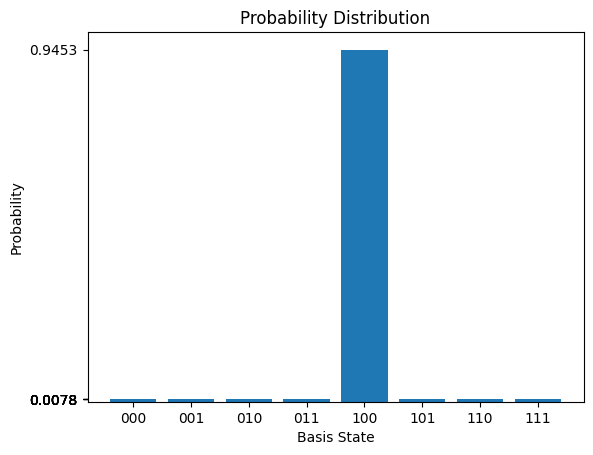

In [27]:
n_qubits = 3
itarations = "optimal"

dev = qml.device("default.qubit", wires=n_qubits + 1)
Grover = qml.QNode(grover, dev)

probs = Grover(n_qubits, iterations=itarations)

#Visualize the probability histogram
import matplotlib.pyplot as plt
plt.bar([np.binary_repr(i, width=n_qubits) for i in range(2**n_qubits)], probs)

plt.xlabel("Basis State")
plt.ylabel("Probability")
plt.yticks(probs)
plt.title("Probability Distribution")